# Test on simulated series

In [25]:
# import packages
import numpy as np
import pandas as pd
from numpy.random import randn
from shapedtw.shapedtw import shape_dtw
from shapedtw.shapeDescriptors import SlopeDescriptor, PAADescriptor, CompoundDescriptor, DerivativeShapeDescriptor, DWTDescriptor
from shapedtw.dtwPlot import dtwPlot
from matplotlib import pyplot as plt
from dtw import dtw
import math
from scipy.signal import convolve, savgol_filter
from scipy.interpolate import interp1d
import random
from sktime.datasets import load_osuleaf
from tqdm import tqdm
from utils import *


We use the OSULeaf dataset

In [4]:
X, y = load_osuleaf()

## Show some scale vectors and a simulated alignment

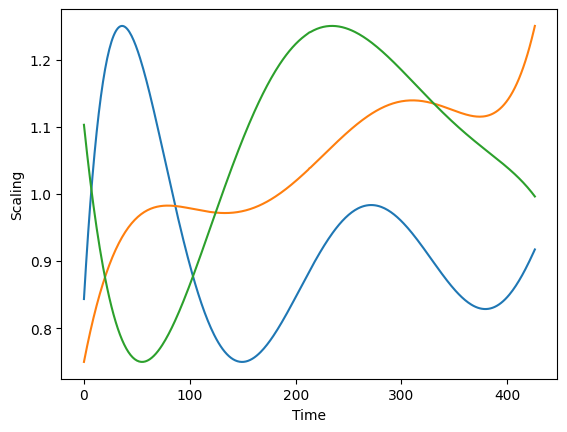

In [18]:
for _ in range(3):
    plt.plot(sim_scale_vector(427, a=0.75, b=1.25))
plt.xlabel('Time')
plt.ylabel('Scaling')
plt.show()

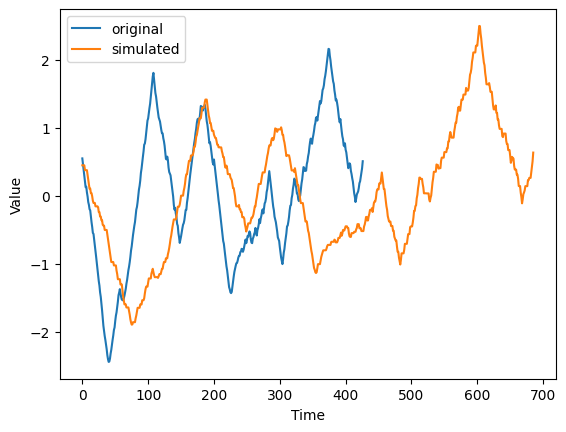

In [19]:
ts = np.array(X.iloc[0].to_list()[0])
sim_ts, index1, index2 = sim_aligned(ts, alpha=0.3, a=0.75, b=1.25, plot_scale=False)

## Example where shapeDTW catches better local shaping than DTW

We use the OSULeaf dataset : outlines of different leaves

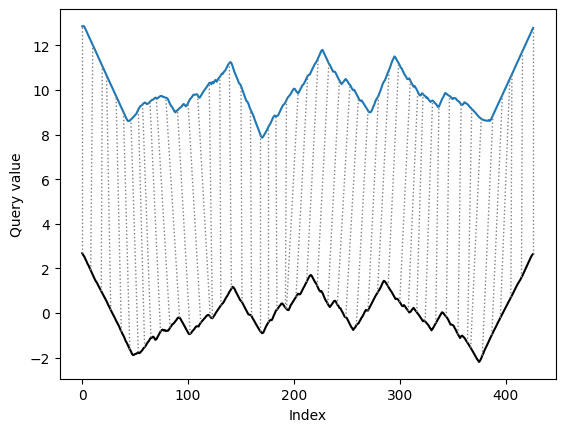

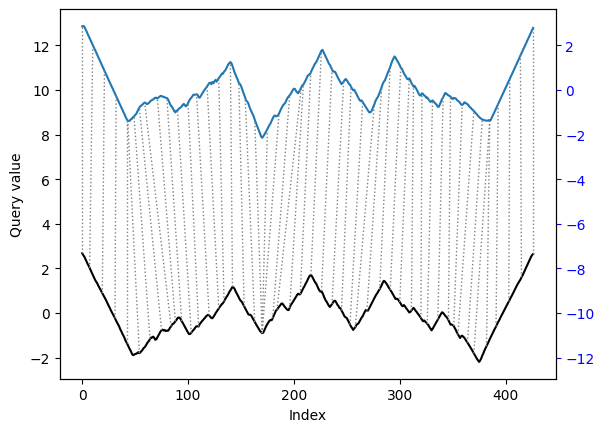

In [36]:
ts1 = np.array(X.iloc[336].to_list()[0])
ts2 = np.array(X.iloc[115].to_list()[0])
derivative_descriptor = DerivativeShapeDescriptor()
shape_dtw_res = shape_dtw(
    x=ts1,
    y=ts2,
    subsequence_width=25,
    shape_descriptor=derivative_descriptor,
    keep_internals=True
)
dtwPlot(shape_dtw_res, plot_type="twoway", yoffset = 10)

# Calculate DTW distance
alignment = dtw(ts1, ts2, keep_internals=True)
alignment.plot('twoway', offset=10)
plt.show()

## Performance comparaison in terms of Mean Absolute Deviation

For all series in the dataset, and some stretching pourcentages, we compute areas between ground truth and both DTW and shapeDTW

In [38]:
alpha_range = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
res_dtw = []
res_shaptedtw = []
for alpha in tqdm(alpha_range):
    dtw_alpha = 0
    shapedtw_alpha = 0
    for i in range(442):
        ts = np.array(X.iloc[i].to_list()[0])
        #index1 and index2 represent ground truth alignment
        sim_ts, index1, index2 = sim_aligned(ts, alpha=alpha, a=0.75, b=1.25, plot_scale=False, plot_series=False)
        dtw_res = dtw(ts, sim_ts, keep_internals=True)
        shape_dtw_res = shape_dtw(
            x=ts,
            y=sim_ts,
            subsequence_width=25,
            shape_descriptor=derivative_descriptor,
            keep_internals=True
        )
        # compute alignments
        align_gt = np.column_stack((index1, index2))
        align_dtw = np.column_stack((dtw_res.index1, dtw_res.index2))
        align_shapedtw = np.column_stack((shape_dtw_res.index1, shape_dtw_res.index2))
        dtw_alpha += align_dist_area(align_gt, align_dtw)
        shapedtw_alpha += align_dist_area(align_gt, align_shapedtw)
    dtw_alpha /= 442
    res_dtw.append(dtw_alpha)
    shapedtw_alpha /= 442
    res_shaptedtw.append(shapedtw_alpha)

100%|██████████| 8/8 [07:05<00:00, 53.23s/it]


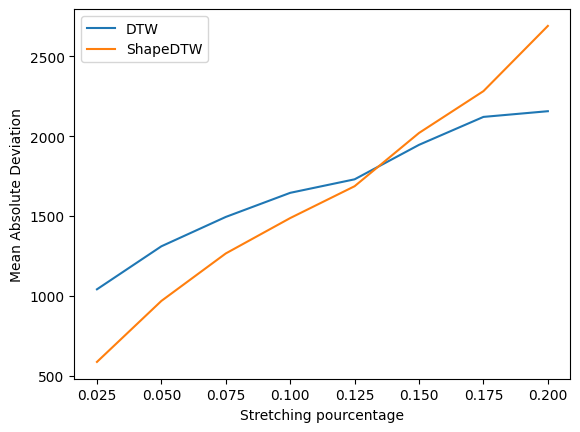

In [41]:
plt.plot(alpha_range, res_dtw, label='DTW')
plt.plot(alpha_range, res_shaptedtw, label='ShapeDTW')
plt.xlabel('Stretching pourcentage')
plt.ylabel('Mean Absolute Deviation')
plt.legend()
plt.show()

In [44]:
res_shaptedtw

[585.8619909502263,
 967.8257918552036,
 1265.2443438914027,
 1486.8823529411766,
 1686.3710407239819,
 2019.9321266968325,
 2281.9298642533936,
 2690.3529411764707]